# Predicting Manufacturing Defects

# Introduction
This dataset provides insights into factors influencing defect rates in a manufacturing environment. Each record represents various metrics crucial for predicting high or low defect occurrences in production processes.

## Variables Description
### Production Metrics
**ProductionVolume**: Number of units produced per day.

Data Type: Integer.

Range: 100 to 1000 units/day.

**ProductionCost**: Cost incurred for production per day.

Data Type: Float.

Range: $5000 to $20000.

### Supply Chain and Logistics
**SupplierQuality**: Quality ratings of suppliers.

Data Type: Float (%).

Range: 80% to 100%.

**DeliveryDelay**: Average delay in delivery.

Data Type: Integer (days).

Range: 0 to 5 days.

### Quality Control and Defect Rates
**DefectRate**: Defects per thousand units produced.

Data Type: Float.

Range: 0.5 to 5.0 defects.

**QualityScore**: Overall quality assessment.

Data Type: Float (%).

Range: 60% to 100%.

### Maintenance and Downtime
**MaintenanceHours**: Hours spent on maintenance per week.

Data Type: Integer.

Range: 0 to 24 hours.

**DowntimePercentage**: Percentage of production downtime.

Data Type: Float (%).

Range: 0% to 5%.

### Inventory Management
**InventoryTurnover**: Ratio of inventory turnover.

Data Type: Float.

Range: 2 to 10.

**StockoutRate**: Rate of inventory stockouts.

Data Type: Float (%).

Range: 0% to 10%.

### Workforce Productivity and Safety
**WorkerProductivity**: Productivity level of the workforce.

Data Type: Float (%).

Range: 80% to 100%.

**SafetyIncidents**: Number of safety incidents per month.

Data Type: Integer.

Range: 0 to 10 incidents.

### Energy Consumption and Efficiency
**EnergyConsumption**: Energy consumed in kWh.

Data Type: Float.

Range: 1000 to 5000 kWh.

**EnergyEfficiency**: Efficiency factor of energy usage.

Data Type: Float.

Range: 0.1 to 0.5.

### Additive Manufacturing
**AdditiveProcessTime**: Time taken for additive manufacturing.

Data Type: Float (hours).

Range: 1 to 10 hours.

**AdditiveMaterialCost**: Cost of additive materials per unit.

Data Type: Float ($).

Range: $100 to $500.

### Target Variable
**DefectStatus**: Predicted defect status.

Data Type: Binary (0 for Low Defects, 1 for High Defects).

## Defect Instances
The dataset focuses on defect instances more because they do not occur often. However, non-defect instances were added too for this reason the dataset is imbalanced, consider balancing it before proceeding with machine learning techniques.

## Data Conclusion
This dataset encompasses a comprehensive collection of metrics vital for predicting defect rates in manufacturing operations. It includes production volumes, supply chain quality, quality control assessments, maintenance schedules, inventory management details, workforce productivity metrics, energy consumption patterns, additive manufacturing specifics, and more.


In [1]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# Loading the data to the project
df = pd.read_csv('./datasets/manufacturing_defect_dataset.csv')

In [3]:
# Describing the data
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  AdditiveMaterialCost 

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


In [4]:
print(df.describe())

       ProductionVolume  ProductionCost  SupplierQuality  DeliveryDelay  \
count       3240.000000     3240.000000      3240.000000    3240.000000   
mean         548.523148    12423.018476        89.833290       2.558951   
std          262.402073     4308.051904         5.759143       1.705804   
min          100.000000     5000.174521        80.004820       0.000000   
25%          322.000000     8728.829280        84.869219       1.000000   
50%          549.000000    12405.204656        89.704861       3.000000   
75%          775.250000    16124.462428        94.789936       4.000000   
max          999.000000    19993.365549        99.989214       5.000000   

        DefectRate  QualityScore  MaintenanceHours  DowntimePercentage  \
count  3240.000000   3240.000000       3240.000000         3240.000000   
mean      2.749116     80.134272         11.476543            2.501373   
std       1.310154     11.611750          6.872684            1.443684   
min       0.500710     60.01

As we can see there is no anomalies in the data, so we can prosed with the analysis.

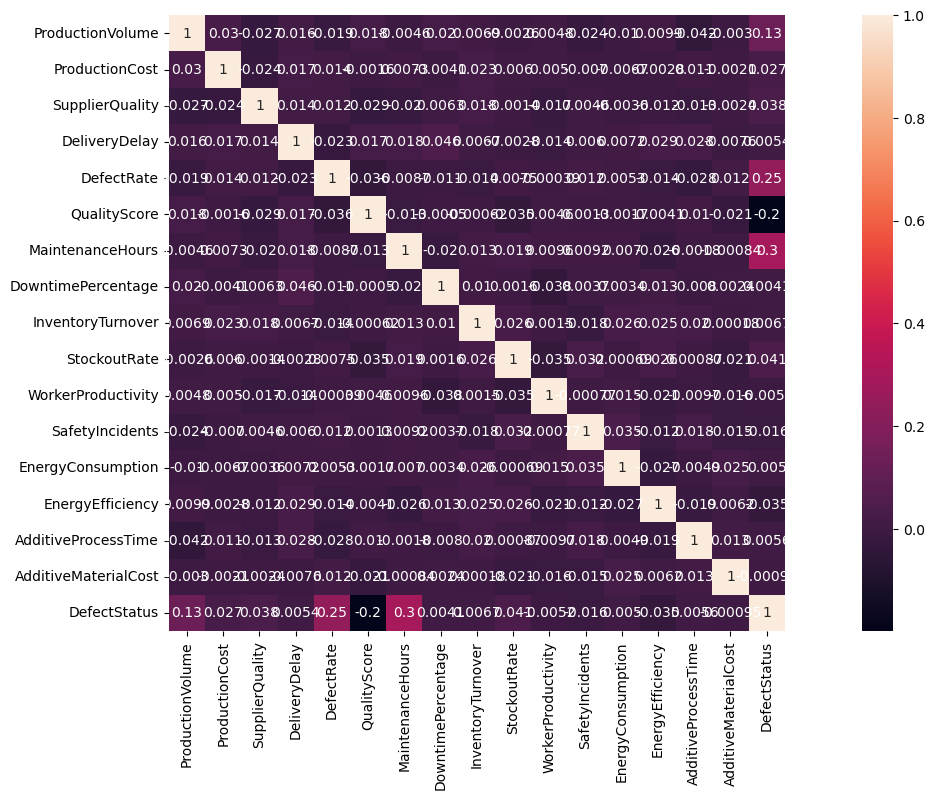

In [17]:
# Making a correlation Matrix
cm = df.corr()

# Plotting a heatmap 
plt.figure(figsize=(20,8))
sns.heatmap(cm, annot=True, square=True)
plt.show()

In [6]:
defects = df.groupby('DefectStatus').mean()
print(defects)

              ProductionVolume  ProductionCost  SupplierQuality  \
DefectStatus                                                      
0                   470.866538    12158.877326        89.328686   
1                   563.267352    12473.169403        89.929096   

              DeliveryDelay  DefectRate  QualityScore  MaintenanceHours  \
DefectStatus                                                              
0                  2.537718    2.010328     85.442375          6.791103   
1                  2.562982    2.889386     79.126454         12.366140   

              DowntimePercentage  InventoryTurnover  StockoutRate  \
DefectStatus                                                        
0                       2.487697           5.983667      0.048197   
1                       2.503970           6.026496      0.051387   

              WorkerProductivity  SafetyIncidents  EnergyConsumption  \
DefectStatus                                                           
0        

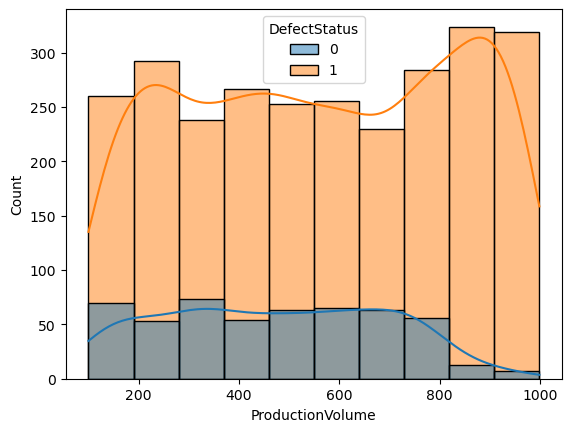

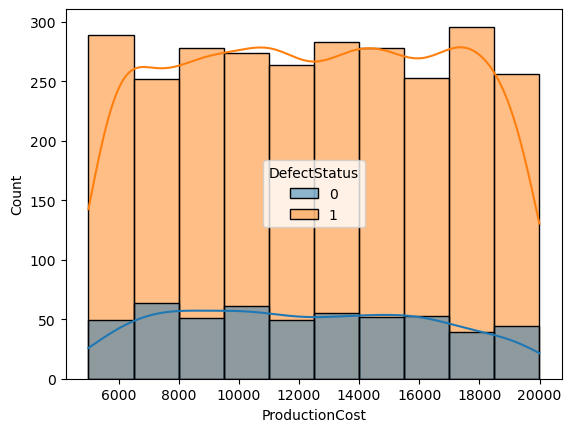

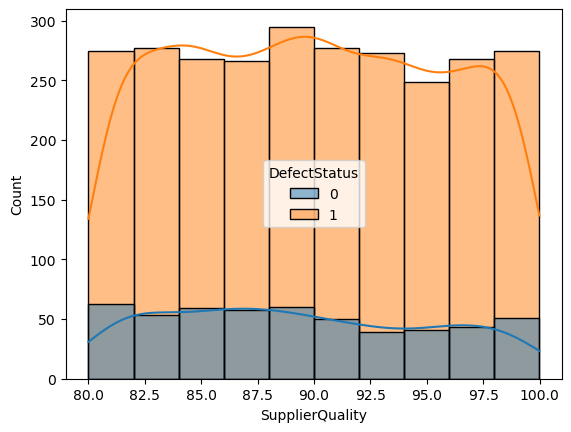

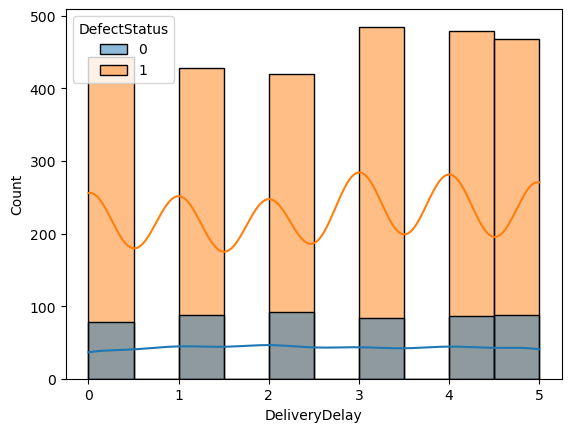

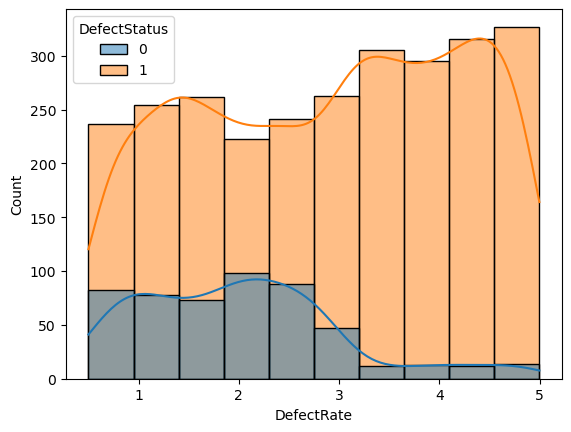

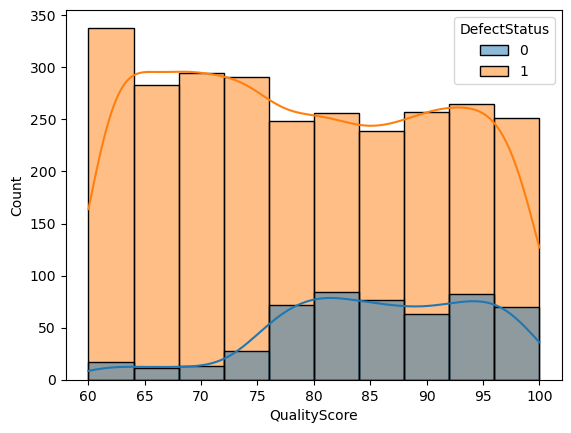

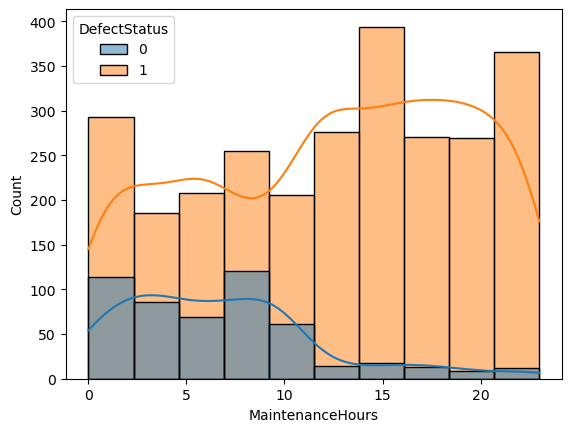

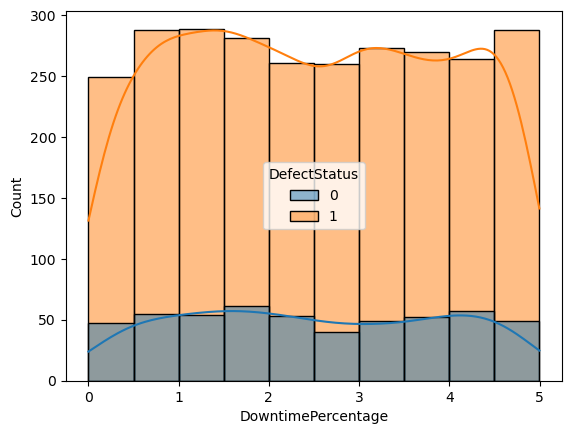

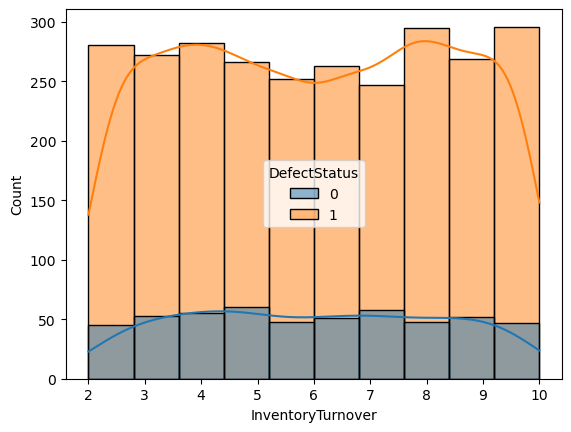

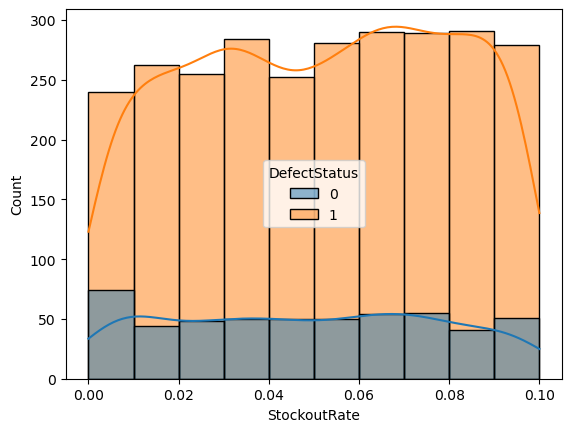

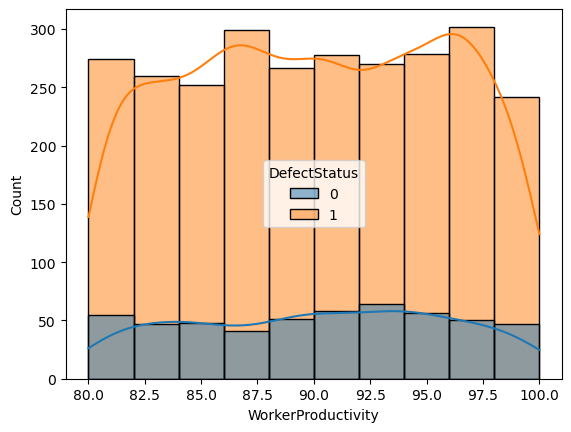

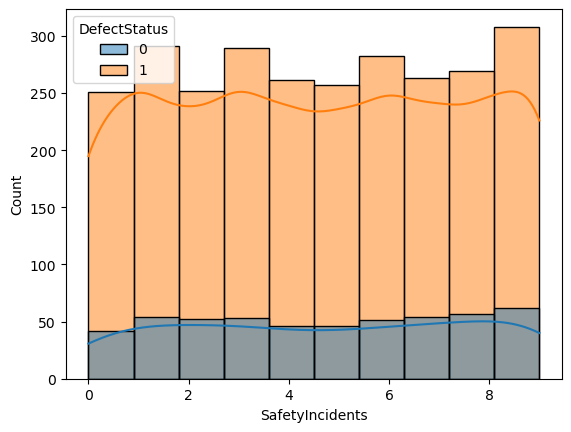

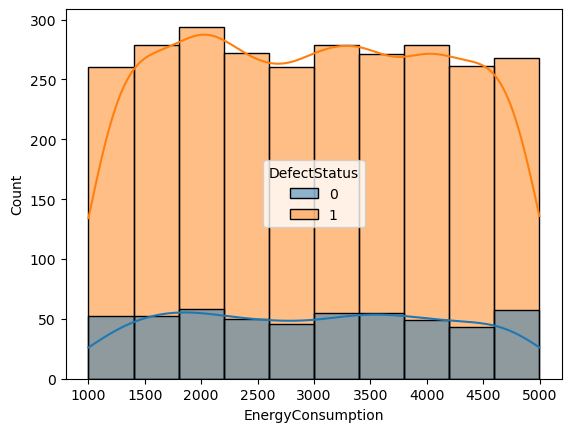

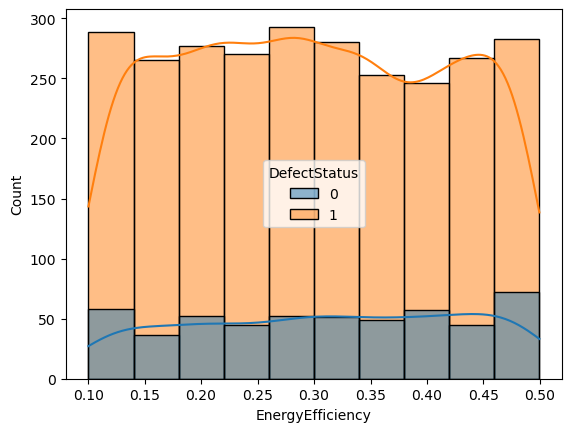

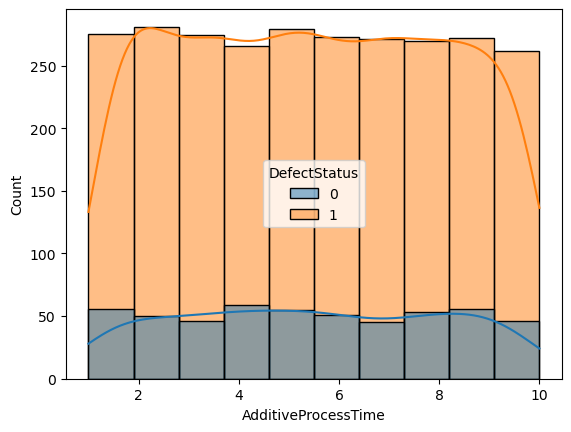

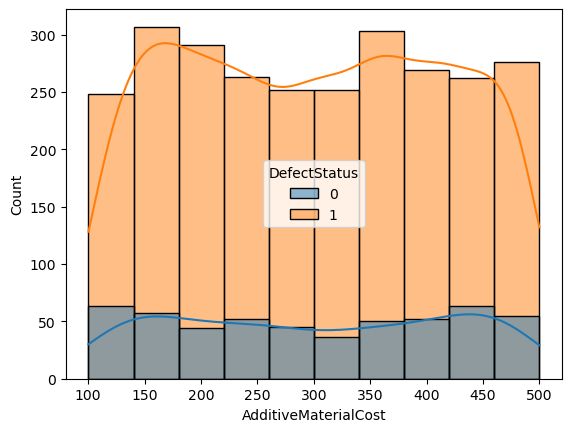

In [7]:
variables = np.array(df.columns)
variables = variables[variables != "DefectStatus"]

for variable in variables:
    sns.histplot(data = df, x=variable, bins = 10, kde=True, hue = "DefectStatus" )
    plt.show()

We notice the following: 

* The probability of produce more defects in production increase if the production volume is above 800 pieces per day. 
* If the maintenance hours per week are above 10 hours, the probability of produce defects in production increase. 

# Entrenando el modelo de Clasificación Binaria



In [8]:
# Dividing the data
X = df.drop("DefectStatus", axis = 1)
y = df['DefectStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

For this project we are going to train 2 models:

* Random Forest
* Gradient Boosting

Then we are going to compare the behavior of this models according to the results of the metrics:

* Accuracy
* Precision
* Recall
* F1 and
* ROC_AUC

Lets begin with the training of the models.

In [9]:
# Train StandarScaler
scaler = StandardScaler()
scaler.fit(X_train)

# Transform train data and test data
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

## Logistic Regression model

In [10]:
# Logistic Regresión model
lr_model = LogisticRegression(random_state=0)
# Model Train
lr_model.fit(X_train_st, y_train)
# Using trained model to predict
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

## Decision Tree Model

In [11]:
# Decisión Tree Model
tree_model = DecisionTreeClassifier(random_state=0)
# Model Train
tree_model.fit(X_train_st, y_train)
# Using trained model to predict
tree_predictions = tree_model.predict(X_test_st)
tree_probabilities = tree_model.predict_proba(X_test_st)[:,1]

## Random Forest Model

In [12]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# Model Train
rf_model.fit(X_train_st, y_train)
# Using trained model to predict
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

## Gradient Boosting Model

In [13]:
# Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators = 100, random_state = 0)
# Model Train
gb_model.fit(X_train_st, y_train)
# Using trained model to predict
gb_predictions = gb_model.predict(X_test_st)
gb_probabilities = gb_model.predict_proba(X_test_st)[:,1]

## Testing models

In [14]:
# Function for metrics 
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [15]:
# Logistic regression
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Logistic Regression Metrics:')
# Decision tree
print_all_metrics(y_test, tree_predictions, tree_probabilities, title='Decision Tree Metrics:')
# Random Forest
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Random Forest Metrics:')
# Gradient Boosting
print_all_metrics(y_test, gb_predictions, gb_probabilities, title = 'Gradient Boosting Metrics:')

Logistic Regression Metrics:
	Accuracy: 0.85
	Precision: 0.86
	Recall: 0.97
	F1: 0.91
	ROC_AUC: 0.84
Decision Tree Metrics:
	Accuracy: 0.90
	Precision: 0.94
	Recall: 0.93
	F1: 0.94
	ROC_AUC: 0.85
Random Forest Metrics:
	Accuracy: 0.95
	Precision: 0.95
	Recall: 0.99
	F1: 0.97
	ROC_AUC: 0.88
Gradient Boosting Metrics:
	Accuracy: 0.95
	Precision: 0.95
	Recall: 0.99
	F1: 0.97
	ROC_AUC: 0.90


As we can see, the models more trustable are "Random Forest" and "Gradient Booster", where the latter is slightly better, so we will choose this option.

# Conclusions

According with the results of this project we can conclude the following: 

* The probability of produce more defects in production increase if the production volume is above 800 pieces per day. 
* If the maintenance hours per weeks are above 10 hours, the probability of produce defects in production increase.
* The most optimized model for the prediction of Manufacturing Defects is "Gradient Boosting". 


# Data License

The data used in this project was provided for Rabie El Kharoua.

Rabie El Kharoua. (2024). 🏭 Predicting Manufacturing Defects Dataset [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8715500